<a href="https://colab.research.google.com/github/flaakira/Alura/blob/master/Portfolio_Analisando_indicao_de_oscar_2014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## comparativo entre filme ganhador de oscar e indacoes.
- Verificar pela nota na amostra do movieleans qual seria o filme ganhador do oscar no ano de 2014

- comparar budget, bilheteria. correlacao , erro

- apos comparar com os 3 maiores filmes de bilheteria do ano

##**12 YEARS A SLAVE** 

AMERICAN HUSTLE

CAPTAIN PHILLIPS

DALLAS BUYERS CLUB 

GRAVITY 

HER 

NEBRASKA 

PHILOMENA 

THE WOLF OF WALL STREET 

In [0]:
import pandas as pd

In [0]:
filmes = pd.read_csv('movies.csv')
avaliacao = pd.read_csv('ratings.csv')

In [6]:
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
avaliacao.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
oscar = filmes.query("movieId in [105844,106916,105504, 106100, 104841, 106920, 105197, 106438, 106782]")
oscar

,movieId,title,genres
8252,104841,Gravity (2013),Action|Sci-Fi|IMAX
8264,105197,Nebraska (2013),Adventure|Drama
8274,105504,Captain Phillips (2013),Adventure|Drama|Thriller|IMAX
8285,105844,12 Years a Slave (2013),Drama
8290,106100,Dallas Buyers Club (2013),Drama
8293,106438,Philomena (2013),Comedy|Drama
8305,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama
8311,106916,American Hustle (2013),Crime|Drama
8313,106920,Her (2013),Drama|Romance|Sci-Fi


In [0]:
import matplotlib.pyplot as plt

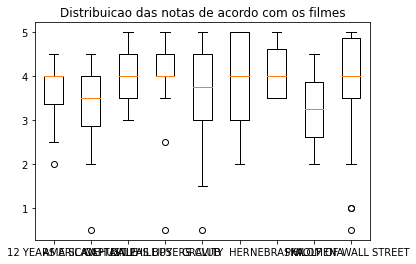

In [10]:
notas105844 = avaliacao.query("movieId == 105844")
notas106916 = avaliacao.query("movieId == 106916")
notas105504 = avaliacao.query("movieId == 105504")
notas106100 = avaliacao.query("movieId == 106100")
notas104841 = avaliacao.query("movieId == 104841")
notas106920 = avaliacao.query("movieId == 106920")
notas105197 = avaliacao.query("movieId == 105197")
notas106438 = avaliacao.query("movieId == 106438")
notas106782 = avaliacao.query("movieId == 106782")

plt.boxplot([notas105844.rating, notas106916.rating, notas105504.rating, 
             notas106100.rating, notas104841.rating, notas106920.rating,
             notas105197.rating, notas106438.rating, notas106782.rating]
            , labels=['12 YEARS A SLAVE', 'AMERICAN HUSTLE', 'CAPTAIN PHILLIPS', 
                      'DALLAS BUYERS CLUB', 'GRAVITY', 'HER', 'NEBRASKA', 'PHILOMENA',
                      'WOLF OF WALL STREET'])
plt.title('Distribuicao das notas de acordo com os filmes')
plt.rcParams['figure.figsize']=20,10

In [11]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
nota_media_por_filme = avaliacao.groupby("movieId").mean()["rating"]
nota_media_por_filme.head(100)

movieId
1      3.920930
2      3.431818
3      3.259615
4      2.357143
5      3.071429
         ...   
107    3.326923
108    4.000000
110    4.031646
111    4.105769
112    3.543478
Name: rating, Length: 100, dtype: float64

In [13]:
nota_media_por_filme = pd.DataFrame(data=nota_media_por_filme)
nota_media_por_filme

,rating
movieId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429
...,...
193581,4.000000
193583,3.500000
193585,3.500000


In [14]:
nota = nota_media_por_filme.query("movieId in [105844,106916,105504, 106100, 104841, 106920, 105197, 106438, 106782]")
nota

,rating
movieId,
104841,3.578125
105197,4.125000
105504,4.047619
105844,3.625000
106100,3.970588
106438,3.250000
106782,3.916667
106916,3.250000
106920,3.920000


In [15]:
 oscar.sort_values(by='genres') 

,movieId,title,genres
8252,104841,Gravity (2013),Action|Sci-Fi|IMAX
8264,105197,Nebraska (2013),Adventure|Drama
8274,105504,Captain Phillips (2013),Adventure|Drama|Thriller|IMAX
8305,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama
8293,106438,Philomena (2013),Comedy|Drama
8311,106916,American Hustle (2013),Crime|Drama
8285,105844,12 Years a Slave (2013),Drama
8290,106100,Dallas Buyers Club (2013),Drama
8313,106920,Her (2013),Drama|Romance|Sci-Fi


In [0]:
new_col = [3.578125,4.125000, 4.047619, 3.625000, 3.970588, 3.250000, 3.916667, 3.250000, 3.920000]

In [0]:
oscar.insert(loc=0,column='rating', value=new_col)

In [35]:
oscar

,rating,movieId,title,genres
8252,3.578125,104841,Gravity (2013),Action|Sci-Fi|IMAX
8264,4.125000,105197,Nebraska (2013),Adventure|Drama
8274,4.047619,105504,Captain Phillips (2013),Adventure|Drama|Thriller|IMAX
8285,3.625000,105844,12 Years a Slave (2013),Drama
8290,3.970588,106100,Dallas Buyers Club (2013),Drama
8293,3.250000,106438,Philomena (2013),Comedy|Drama
8305,3.916667,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama
8311,3.250000,106916,American Hustle (2013),Crime|Drama
8313,3.920000,106920,Her (2013),Drama|Romance|Sci-Fi


In [36]:
 oscar.sort_values(by='rating') 

,rating,movieId,title,genres
8293,3.250000,106438,Philomena (2013),Comedy|Drama
8311,3.250000,106916,American Hustle (2013),Crime|Drama
8252,3.578125,104841,Gravity (2013),Action|Sci-Fi|IMAX
8285,3.625000,105844,12 Years a Slave (2013),Drama
8305,3.916667,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama
8313,3.920000,106920,Her (2013),Drama|Romance|Sci-Fi
8290,3.970588,106100,Dallas Buyers Club (2013),Drama
8274,4.047619,105504,Captain Phillips (2013),Adventure|Drama|Thriller|IMAX
8264,4.125000,105197,Nebraska (2013),Adventure|Drama


#**Verificar pela nota na amostra do movieleans qual seria o filme ganhador do oscar no ano de 2014



**Conforme o grafico de candes e a media das avaliacoes, o filme "12 years a slave" ganhador do oscar 2014, nao foi considerado o filme melhor avaliado pelo publico em geral**

In [0]:
tmdb = pd.read_csv('tmdb_5000_movies.csv')

In [39]:
tmdb.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [0]:
tmdb_oscar = tmdb.drop(['genres', 'homepage', 'keywords', 'original_language', 
                              'overview', 'production_companies', 'runtime', 'spoken_languages', 
                              'status', 'tagline'], axis=1)

In [42]:
tmdb_oscar.head()

,budget,id,original_title,popularity,production_countries,release_date,revenue,title,vote_average,vote_count
0,237000000,19995,Avatar,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,Avatar,7.2,11800
1,300000000,285,Pirates of the Caribbean: At World's End,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,206647,Spectre,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,Spectre,6.3,4466
3,250000000,49026,The Dark Knight Rises,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,The Dark Knight Rises,7.6,9106
4,260000000,49529,John Carter,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,John Carter,6.1,2124


In [0]:
timdb_oscar = tmdb_oscar.query("title in ['Gravity','Nebraska','Captain Phillips', 'Wolf of Wall Street', 'Philomena', 'American Hustle', '12 Years a Slave', 'Dallas Buyers Club', 'Her']")

In [0]:
tmdb_oscar = timdb_oscar.drop(['production_countries'], axis=1)

In [51]:
tmdb_oscar.head(10)

,budget,id,original_title,popularity,release_date,revenue,title,vote_average,vote_count
239,105000000,49047,Gravity,110.153618,2013-09-27,716392705,Gravity,7.3,5751
818,55000000,109424,Captain Phillips,52.786917,2013-10-10,95000000,Captain Phillips,7.6,2454
1149,40000000,168672,American Hustle,49.664128,2013-12-12,251171807,American Hustle,6.8,2807
1997,23000000,152601,Her,53.682367,2013-12-18,47351251,Her,7.9,4097
2105,20000000,76203,12 Years a Slave,95.922900,2013-10-18,187000000,12 Years a Slave,7.9,3674
2843,12000000,205220,Philomena,29.019504,2013-11-01,100129872,Philomena,7.4,579
2849,12000000,129670,Nebraska,29.223881,2013-09-21,17654912,Nebraska,7.4,636
3571,5000000,152532,Dallas Buyers Club,59.454473,2013-09-07,55198285,Dallas Buyers Club,7.9,2886


Porem considerando a analise do banco de dados da TMDB_5000, o filme ***12 Years a Slave*** recebe junto com outros filmes da lista a maior media de avaliacao.

# Analisando popularidade X budget

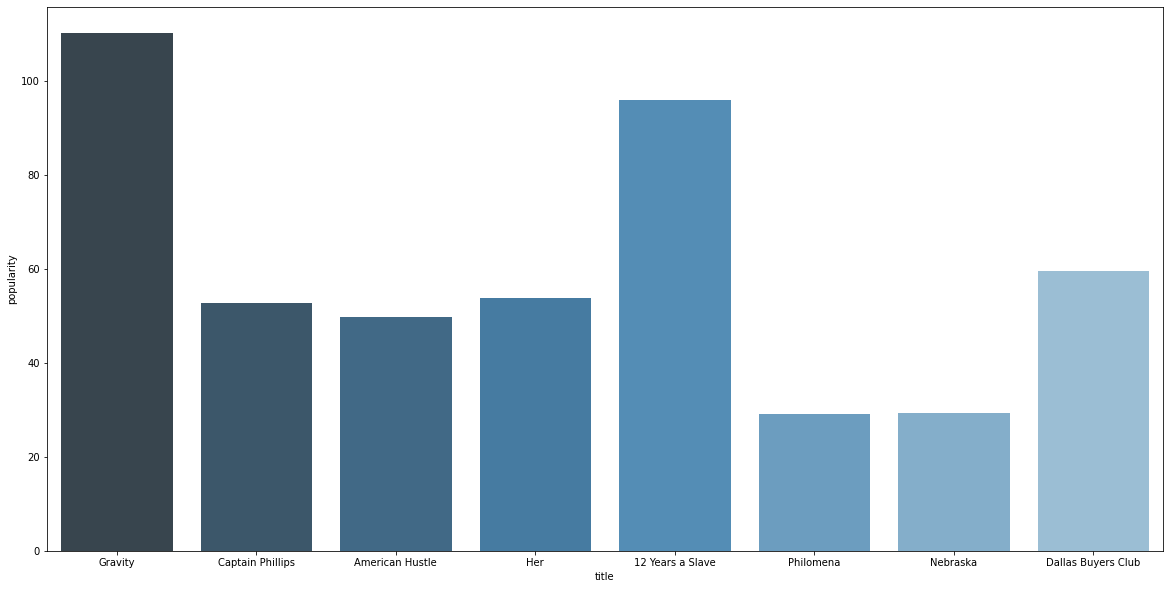

In [68]:
sns.set_color_codes("pastel")

sns.barplot(x="title", y="popularity", data=tmdb_oscar,
            label="popularidade X budget", palette="Blues_d")